In [1]:
from cProfile import label
import numpy as np
import matplotlib.pyplot as plt
import itertools
import cvxpy as cp
import pickle
import manygrid

from compute_solns import *
from grid_examples import *

In [4]:
# Choose example
examples = [(ex1, "manygrid_example_a_10",1,10), 
            (ex2, "manygrid_example_b_10",1,10),
            (ex1, "manygrid_example_c_10",1,10)]
example = examples[2]

In [5]:
# Set up game
grid = example[0]()
gamma, T = example[2], example[3]
game = manygrid.get_game(grid,gamma,T)
initial_state = grid.get_state()

# Run experiments
name = example[1]
manygrid.run_exp(grid,manygrid.get_game(grid,gamma,T), False,T=T, name=name)

# Choose initial epsilon
eps = 0.5

6804
Checking if solutions exist...
Loading solutions...
No solutions, so now computing solutions...
Computing baseline...
9, 8, 7, 6, 5, 4, 3, 2, 1, 0, Done with baseline!
Computing maximax...
9, 8, 7, 6, 5, 4, 3, 2, 1, 0, Done with maximax!
Computing ex post solution...
9, Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-11
8, 7, 6, 5, 4, 3, 2, 1, 0, Done with ex post!
Saving solutions
Done!


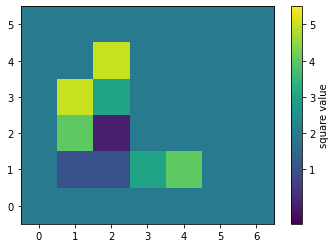

In [6]:
# Render grid
grid.set_state(initial_state)
grid.render()

In [7]:
# Setup simulation
grid.set_state(initial_state)
grid.set_epsilon(eps)
state = grid.get_state()

In [8]:
# Run simulation
res = manygrid.run_sim_single(state, grid, 100, T=T, name=name)

Computing statistics against different agents
('gift', 'coop')
((1, 2, 1, 1, 0, 0), 0.5)
state= ((2, 2, 1, 1, 0, 0), 0.6000000000000001) , uH= U , strat= [[1. 0. 0. 0. 0. 0.]] , uR= D , dr= 0.10000000000179107 , r+dr= 0.6000000000017911 , constraint= 0.51000000000515 , v_adv= -0.09999999998685488
state= ((2, 1, 1, 2, 0, 0), 0.7000000000000001) , uH= L , strat= [[0. 0. 1. 0. 0. 0.]] , uR= R , dr= 0.1799999999971083 , r+dr= 0.7799999999971083 , constraint= 0.6000000000008323 , v_adv= 1.659577186223249e-11
state= ((2, 1, 1, 3, 1, 0), 0.7000000000000001) , uH= S , strat= [[0. 0. 0. 0. 1. 0.]] , uR= R , dr= 0.06999999995500125 , r+dr= 0.7699999999550013 , constraint= 0.5899999999991714 , v_adv= 0.20000000001522675
state= ((3, 1, 1, 4, 1, 0), 0.8) , uH= U , strat= [[1. 0. 0. 0. 0. 0.]] , uR= R , dr= 0.1499999999971483 , r+dr= 0.8499999999971484 , constraint= 0.6700000000048827 , v_adv= 0.29999999996692
state= ((3, 1, 1, 4, 1, 1), 1.0) , uH= U , strat= [[1. 0. 0. 0. 0. 0.]] , uR= S , dr= 0.22

<ErrorbarContainer object of 3 artists>

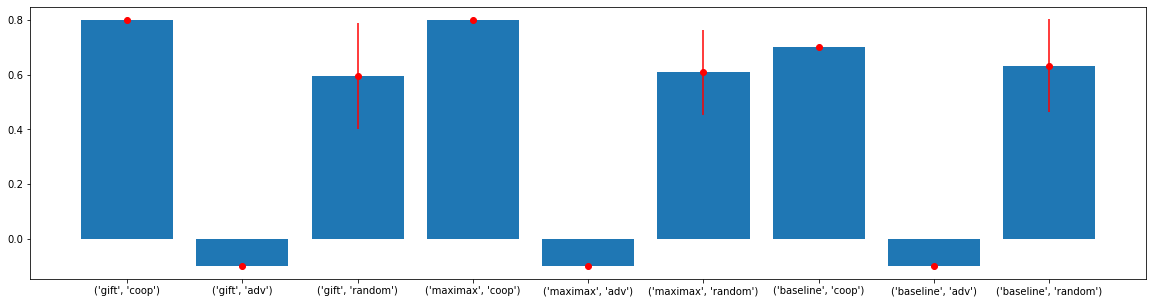

In [9]:
# Plot results
ress = list(zip(*res.items()))
x,z = ress[0],ress[1]
x = [str(i) for i in x]
y = [i[0] for i in z]
c  = [i[1] for i in z]
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.errorbar(x, y, yerr=c, fmt="o", color="r")

In [10]:
# Simulation output
res

{('gift', 'coop'): (0.7999999999999998, 2.220446049250313e-16),
 ('gift', 'adv'): (-0.09999999999999998, 2.7755575615628914e-17),
 ('gift', 'random'): (0.5950000000000001, 0.19202864369671516),
 ('maximax', 'coop'): (0.7999999999999998, 2.220446049250313e-16),
 ('maximax', 'adv'): (-0.09999999999999998, 2.7755575615628914e-17),
 ('maximax', 'random'): (0.6080000000000001, 0.15406492138056604),
 ('baseline', 'coop'): (0.7000000000000002, 2.220446049250313e-16),
 ('baseline', 'adv'): (-0.09999999999999998, 2.7755575615628914e-17),
 ('baseline', 'random'): (0.6330000000000002, 0.1685556287995153)}

In [9]:
res = manygrid.run_sim_single(state, grid, 1, T=T, name=name)

Computing statistics against different agents
('gift', 'coop')
((1, 2, 1, 1, 0, 0), 0.1)
state= ((2, 2, 1, 1, 0, 0), 0.0) , uH= U , strat= [[1. 0. 0. 0. 0. 0.]] , uR= D , dr= -0.0699999993086069 , r+dr= 0.03000000069139311 , constraint= 0.03000000069139308 , v_adv= 0.6999999959178724
state= ((2, 1, 2, 1, 0, 0), 0.0) , uH= L , strat= [[0. 0. 1. 0. 0. 0.]] , uR= U , dr= -0.06999999960587344 , r+dr= -0.06999999960587344 , constraint= -0.06999999960587344 , v_adv= 0.6999999962325173
state= ((3, 1, 3, 1, 0, 0), 0.0) , uH= U , strat= [[1. 0. 0. 0. 0. 0.]] , uR= U , dr= -0.06999999958764902 , r+dr= -0.06999999958764902 , constraint= -0.06999999958764902 , v_adv= 0.6999999962518265
state= ((3, 1, 3, 1, 0, 0), 0.0) , uH= U , strat= [[1. 0. 0. 0. 0. 0.]] , uR= U , dr= -0.059999999091779 , r+dr= -0.059999999091779 , constraint= -0.059999999091779 , v_adv= 0.6999999962935305
state= ((3, 1, 3, 1, 0, 0), 0.0) , uH= U , strat= [[1. 0. 0. 0. 0. 0.]] , uR= U , dr= -0.0499999991515081 , r+dr= -0.0499999